In [1]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np

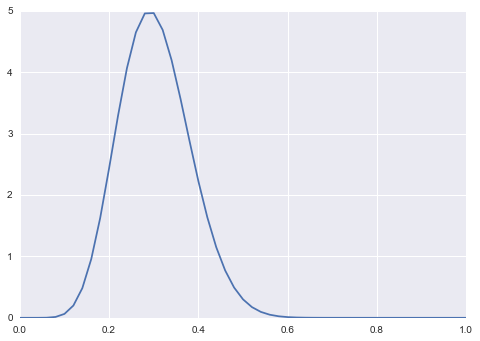

In [2]:
from scipy.stats import beta
from ipywidgets import interact, IntSlider


xs = np.linspace(0, 1, 51)
def plt_beta(a=1, b=1):
    plt.plot(xs, beta.pdf(xs, a, b));
    
interact(plt_beta, 
         a=IntSlider(min=1, max=50, value=10, continuous_update=False), 
         b=IntSlider(min=1, max=50, value=10, continuous_update=False));      